## The Flatté lineshape

The Flatté parameterization is a modification of the Breit-Wigner parameterization. It is used for resonances that are close to the mass threshold of a decay channel in terms of mass. This vicinity distorts the Breit-Wigner lineshape and therefore, needs to be taken into account.

For a given closed channel b$_0$, the factor $q_{b_0}$ has to be calculated below the corresponding threshold ($\sqrt{s} \leq m_{1,{b_0}}+m_{2,{b_0}}$). This is done using analytic continuation $$q_{b_0} \mapsto i \sqrt{-q_{b_0}^2} \quad \text{with} \quad q_{b_0}^2 < 0. $$
With that we get for $m_{1,{b_0}}=m_{2,{b_0}}$:

$$q_{b_0} = \left \{ \begin{array}{c} \sqrt{\frac{s}{4}-m_{b_0}^2} \quad \text{above threshold} \\ i \sqrt{m_{b_0}^2-\frac{s}{4}} \quad \text{below threshold} \end{array} \right.$$

So the momentum of channel $b_0$ becomes purely imaginary, if the total energy $\sqrt{s}$ of the interacting system is below the threshold (channel $b_0$ is closed).

This Notebook computes the Flatté lineshape and compares it to the relativistic Breit-Wigner lineshape by plotting both observed in channel a and in channel $b_0$.

Let's import some useful libraries:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, Layout, VBox
from IPython.display import display,clear_output
import plotly.graph_objects as go
from datetime import datetime
np.seterr(divide='ignore', invalid='ignore')
import os
if not os.path.exists("images"):
    os.mkdir("images")
print('start programm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start programm:(10:27:11.964027)


Please enter your data (it can be changed later):

In [21]:
#Breit-Wigner mass:
mass = 990

#proportionality factor of the numerator function:
alpha = 100

#orbital angular momentum of channel a:
la = 0

#masses of the decay products in channel a (two-body decay):
m1a = 139.57061
m2a = 139.57061

#coupling factor of channel a:
gFaka = 2000

#number of b channels that the resonance is coupled to:
number = 1

#orbital angular momentum of the channels b, insert them in the following manner: lb=[l_0,l_1,...,l_number]:
lb = [0]

#coupling factor of the channels b, [g_0,g_1,...,g_number]:
gFakb = [5000]

#masses of the decay products in the channels b, use e.g. m1b = [m1_0,m1_1,...,m1_number]:
m1b = [493.677]
m2b = [493.677]

We now calculate a list of complex numbers that is used throughout the Notebook to visualize the employed functions:

In [22]:
xrange_left = 0
xrange_right = 1300

limitL = xrange_left**2
limitU = xrange_right**2

#create a number of x values
imag = 0
dev_x = np.linspace(limitL,limitU,num=200)
listx = []
for i in range(0,len(dev_x)):
    listx.append(complex(dev_x[i],imag)) 

Implementation of the momentum of the particles in their center-of-momentum frame:

$ q_i = \frac{\lambda^{1/2}(s,m_{1,i}^{2},m_{2,i}^{2})}{2 \sqrt{s}} $
 with <br>  $\lambda (s,m_{1,i}^{2},m_{2,i}^{2}) = s^2 + m_{1,i}^{4} + m_{2,i}^{4} - 2sm_{1,i}^{2} - 2m_{1,i}^{2}m_{2,i}^{2}-2m_{2,i}^{2}s = (s-(m_{1,i}+m_{2,i})^2) \cdot (s-(m_{1,i}-m_{2,i})^2)$, $i \in \{ a,b_0,... \}$

In [23]:
#Breit-Wigner momentum that doesn't consider the impact of a threshold nearby
def q_BW(s, m1, m2):
    if (np.sqrt(s).real <= m1 + m2):
        return 0
    else:
        return (np.sqrt(s**2 + m1**4 + m2**4 - 2.*s*m1**2 - 2.*m1**2*m2**2 - 2.*m2**2*s))/(2*np.sqrt(s))

#flatte: calculation of the momentum below threshold with analytic continuation
def q_Fl(s, m1, m2):
    return (np.sqrt(s**2 + m1**4 + m2**4 - 2.*s*m1**2 - 2.*m1**2*m2**2 - 2.*m2**2*s))/(2*np.sqrt(s))

To see how the analytic continuation works, let's plot the real and imaginary part of the momentum we use for the Flatté lineshape:

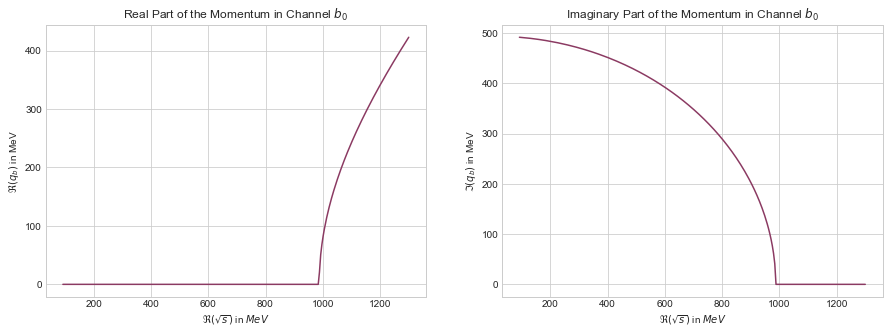

In [24]:
funcA = []
funcB = []
funcC = []
for j in range(0,len(listx)):
    funcA.append(q_Fl(listx[j],m1b[0],m2b[0]).real) 
    funcB.append(q_Fl(listx[j],m1b[0],m2b[0]).imag)
    funcC.append(q_BW(listx[j],m1b[0],m2b[0]).imag)
plt.style.use('seaborn-whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.plot(np.sqrt(listx).real, funcA, color = '#8B3A62')
ax2.plot(np.sqrt(listx).real, funcB, color = '#8B3A62')
#ax2.plot(np.sqrt(listx).real, funcC, color = '#FF796C')

ax1.set_title(r'Real Part of the Momentum in Channel $b_0$')
ax2.set_title(r'Imaginary Part of the Momentum in Channel $b_0$')

ax1.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
ax2.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')

ax1.set_ylabel(r'$\Re{(q_b)}$ in MeV')
ax2.set_ylabel(r'$\Im{(q_b)}$ in MeV')
plt.show()

Calculation of the Blatt Weisskopf form factors $F_l(z)$:
$$F_0^2 = 1$$
$$F_1^2(z) = \frac{1}{1+z^2}$$
$$F_2^2(z) = \frac{1}{9+3z^2+z^4}$$

In [25]:
#Blatt-Weisskopf form factors:
def weiss(z,la):
    if la != 0:
        if la ==1:
            return np.sqrt(1/(1+z**2))
        else:
            return np.sqrt(1/(9+ 3*z**2 + z**4))
    else:
        return 1


Implementation of the factor $n_i(s)$ of the numerator function:

$$n_i(s) = \left(\frac{q_i}{q_0}\right)^{l_i} F_{l_i}\left(\frac{q_i}{q_0}\right)$$

The $n_i$ - function regulates high energy behavior. Therefore, it only has an impact on the lineshape for $l_i > 0$.

In [26]:
def smallnum(s,la,m1,m2,string):
    q0=1  
    if string == "BW":
        return (q_BW(s,m1,m2)/q0)**la*weiss(q_BW(s,m1,m2)/q0,la)
    else:
        return (q_Fl(s,m1,m2)/q0)**la*weiss(q_Fl(s,m1,m2)/q0,la)

We now calculate factor $\rho_i(s)$ that is related to the two body phase space and required to calculate the parametrization width:

$$\rho_i (s) = \frac{2 q_i}{16 \pi \sqrt{s}}$$

In [27]:
def rho(s,m1,m2,string):
    if string == "BW":
        return 2.*q_BW(s,m1,m2)/(16.*np.pi*np.sqrt(s))
    else:
        return 2.*q_Fl(s,m1,m2)/(16.*np.pi*np.sqrt(s))

Let's plot the real and imaginary part of the phase space factor: 

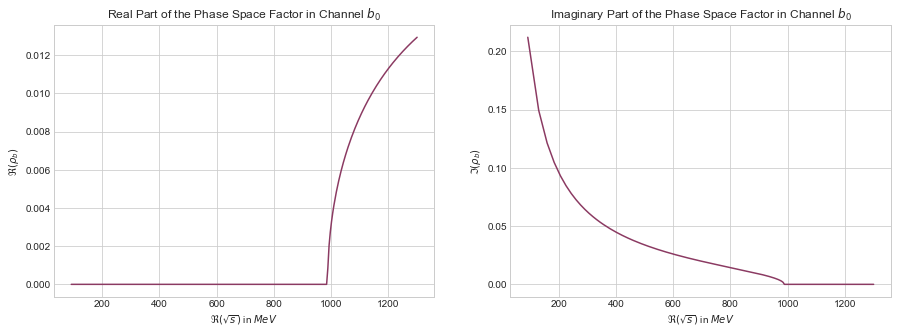

In [38]:
funcA_1 = []
funcB_1 = []
for j in range(0,len(listx)):
    funcA_1.append(rho(listx[j],m1b[0],m2b[0],"Fl").real) 
    funcB_1.append(rho(listx[j],m1b[0],m2b[0],"Fl").imag)
plt.style.use('seaborn-whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.plot(np.sqrt(listx).real, funcA_1, color = '#8B3A62')
ax2.plot(np.sqrt(listx).real, funcB_1, color = '#8B3A62')

ax1.set_title(r'Real Part of the Phase Space Factor in Channel $b_0$')
ax2.set_title(r'Imaginary Part of the Phase Space Factor in Channel $b_0$')

ax1.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
ax2.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')

ax1.set_ylabel(r'$\Re{(\rho_b)}$ ')
ax2.set_ylabel(r'$\Im{(\rho_b)}$ ')
plt.show()

Calculation of the width of the propagator:

$$\Gamma (s) =  \sum_{i=a,b_0,...} g_i^2 \rho_i(s)n_i^2(s)$$

The width is determined by the properties of the decay channels $i$.

In [29]:
def width_sum(s,mass,lb,m1,m2,gFak, string):
   sum = 0.
   for i in range(0,len(gFak)):
       sum += gFak[i]**2*rho(s,m1[i],m2[i],string)*smallnum(s,lb[i],m1[i],m2[i],string)**2
   return sum

Visualizing the real and imaginary part of the width:

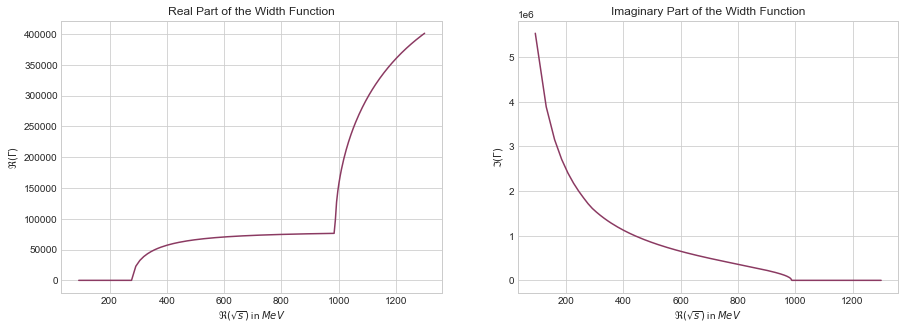

In [30]:
funcA_2 = []
funcB_2 = []
for j in range(0,len(listx)):
    funcA_2.append(width_sum(listx[j],mass,[la] + lb,[m1a] + m1b,[m2a] + m2b,[gFaka] + gFakb, "Fl").real) 
    funcB_2.append(width_sum(listx[j],mass,[la] + lb,[m1a] + m1b,[m2a] + m2b,[gFaka] + gFakb, "Fl").imag)
plt.style.use('seaborn-whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.plot(np.sqrt(listx).real, funcA_2, color = '#8B3A62')
ax2.plot(np.sqrt(listx).real, funcB_2, color = '#8B3A62')

ax1.set_title('Real Part of the Width Function')
ax2.set_title('Imaginary Part of the Width Function')

ax1.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
ax2.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')

ax1.set_ylabel(r'$\Re{(\Gamma)}$ ')
ax2.set_ylabel(r'$\Im{(\Gamma)}$ ')
plt.show()

For a resonance observed in channel i, the numerator function reads  $$N_{i}(s) = \alpha g_i n_i(s)$$
Differentiating between alpha and the coupling factor $g_i$ is not necessary. These parameters are often summarized to a factor $\delta = \alpha \cdot g_i$.
Any variation of both parameters can be expressed as a different variation of either one of them.

In [31]:
#numerator function for the flatte amplitude
def num(s,alpha,li,m1,m2,gFak,string):
    return alpha*gFak*smallnum(s,li,m1,m2,string)

Plots of the numerator function:

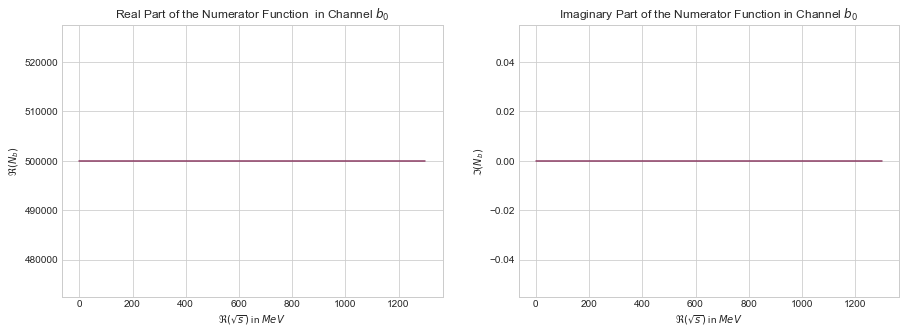

In [39]:
funcA_3 = []
funcB_3 = []
for j in range(0,len(listx)):
    funcA_3.append(num(listx[j],alpha,lb[0],m1b[0], m2b[0],gFakb[0], "Fl").real) 
    funcB_3.append(num(listx[j],alpha,lb[0],m1b[0], m2b[0],gFakb[0], "Fl").imag)
plt.style.use('seaborn-whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.plot(np.sqrt(listx).real, funcA_3, color = '#8B3A62')
ax2.plot(np.sqrt(listx).real, funcB_3, color = '#8B3A62')

ax1.set_title(r'Real Part of the Numerator Function  in Channel $b_0$')
ax2.set_title(r'Imaginary Part of the Numerator Function in Channel $b_0$')

ax1.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')
ax2.set_xlabel(r'$\Re{(\sqrt{s})}$ in $MeV$')

ax1.set_ylabel(r'$\Re{(N_b)}$ ')
ax2.set_ylabel(r'$\Im{(N_b)}$ ')
plt.show()

As long as $l_i=0$ the numerator function does not change with the invariant mass $\sqrt{s}$. 

Calculation of the propagator in channels a and b$_0$:
$$A_i(s) = \frac{N_i(s)}{M_{BW}^2-s-i\Gamma(s)}$$

In [33]:
def amp_a(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b, string):
    gFak = [gFaka] + gFakb
    m1 = [m1a] + m1b
    m2 = [m2a] + m2b
    li = [la] + lb

    return num(s,alpha,la,m1a,m2a,gFaka,string) /  (mass**2-s-1j*(width_sum(s,mass,li,m1,m2,gFak,string)))


In [34]:
def amp_b(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string):
    gFak = [gFaka] + gFakb
    m1 = [m1a] + m1b
    m2 = [m2a] + m2b
    li = [la] + lb
    return num(s,alpha,lb[0],m1b[0],m2b[0],gFakb[0],string) /  (mass**2-s-1j*(width_sum(s,mass,li,m1,m2,gFak,string)))

Plot of the lineshapes in the mass spectrum of channel a:

In [43]:
print('start diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

#choose an imaginary part, that you want to plot your function for (the absolute value of the amplitude is a family of functions depending on the imaginary part of s):
imag = 0
#plot ranges:
#insert ranges for sqrt(s) (of the x axis):
xaxisL = 700
xaxisU = 1200

#calculate the needed ranges for s:
lowlim = xaxisL**2
uplim = xaxisU**2

sReal=np.linspace(lowlim,uplim,num=800)


#function that calculates the transition rate, the squared absolute value of the propagator multiplied with the real part of the phase space
def newF(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string):
    list = []
    for i in sReal:
        s = complex(i,imag)
        res = abs(amp_a(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string))**2*rho(s,m1a,m2a,string).real
        list.append(res)
    return list

#function that calculates the area below the lineshape using the riemann method
def integrate(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string):
    #number of grid points:
    n = 11
    #size of one intervall:
    h = (uplim - lowlim) / (n-1)
    #make a list with all of the gridpoints that we are using:
    list = np.linspace(lowlim, uplim, n)
    #calculate the function at these grid points
    func = newF(list,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string)
    #now calculate the integral:
    riemannL = h * sum(func[:n-1])
    return riemannL

#function that normalises the lineshape using the integrate-function
def normalise(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string):
    res = []
    for i in range(0,len(sReal)):
        interim = abs(amp_a(complex(sReal[i],imag),la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string))**2*rho(complex(sReal[i],imag),m1a,m2a,string).real
        res.append(interim/( integrate(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string)))
    return res



#create a figure widget:
trace1 = go.Scatter(x=np.sqrt(sReal), y= normalise(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,"BW"), name = "Breit-Wigner lineshape")
trace2 = go.Scatter(x=np.sqrt(sReal), y= normalise(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,"Fl"), name = "Flatté lineshape")
lineshape1D = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text=r'$\textrm{Flatté and Breit-Wigner lineshape (observed in channel }a)$'
                        ),
                        xaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "black", title=dict(text=r'$\sqrt{\Re{(s)}} \quad \textrm{[MeV]}$')),
                        yaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "black", title=dict(text=r'$|A_a|^2\cdot \Re{\rho_a}$'))
                    ))

#set the size of the plot:
lineshape1D.layout.autosize = False
lineshape1D.layout.width=650
lineshape1D.layout.height = 600

lineshape1D.layout.plot_bgcolor="white"
lineshape1D.update_traces(line=dict(width=1.8))

lineshape1D.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshape1D.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshape1D.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='LightGrey')

#calculate the threshold of channel b and highlight it with a black, dotted, vertical line:
#(To highlight another threshold just change 'someX' to the desired threshold mass)
someX=m1b[0] + m2b[0]
lineshape1D.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= someX, x1= someX,
      line=dict(
      color="Grey",
      width=1,
      dash="dot"
    )
    )
])


#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update(momentum_a = la, BreitWignerMass = mass, Alpha = alpha, Mass1 = m1a, Mass2 = m2a, Coupling_a = gFaka, momentum_b_0 = lb[0], coupling_b_0 = gFakb[0], mass1_b_0=m1b[0],mass2_b_0=m2b[0]):
    with lineshape1D.batch_update(): 
        lineshape1D.data[0].x = np.sqrt(sReal)
        lineshape1D.data[1].x = np.sqrt(sReal)
        lineshape1D.data[0].y = normalise(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,[momentum_b_0],[coupling_b_0],[mass1_b_0],[mass2_b_0],"BW")
        lineshape1D.data[1].y = normalise(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,[momentum_b_0],[coupling_b_0],[mass1_b_0],[mass2_b_0],"Fl")
        
w=interactive(update,
          momentum_a = widgets.IntSlider(value=la,min=0,max=2,step=1,description=r'l$_a$:'),
          BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M$_{\text{BW}}$:'),
          Alpha = widgets.IntSlider(value=alpha,min=alpha-2, max=alpha + 2,step=1,description=r'$\alpha$:'),
          Mass1 = widgets.IntSlider(value=m1a,min=0,max=2*m1a,step=1,description=r'm$_1^a$:'),
          Mass2 =  widgets.IntSlider(value=m2a,min=0,max=2*m2a,step=1,description=r'm$_2^a$:'),
          Coupling_a = widgets.FloatSlider(value=gFaka,min=0,max=10000.0,step=0.1,description=r'g$_a$'),    
          momentum_b_0 = widgets.IntSlider(value=lb[0],min=0,max=2,step=1,description=r'l$_b$'),
          coupling_b_0 = widgets.FloatSlider(value=gFakb[0],min=0.0,max=10000.0,step=0.1,description=r'g$_b$:'),
          mass1_b_0 = widgets.IntSlider(value=m1b[0],min=0.0,max=2*m1b[0],step=1,description=r'm$_1^b$:'),
          mass2_b_0 = widgets.IntSlider(value=m2b[0],min=0.0,max=2*m2b[0],step=1,description=r'm$_2^b$:'))

#use HBox and VBox to organise the widgets and customise the output: 
box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w.children[0],w.children[1]], layout=Hbox_layout)
h2 = HBox([w.children[2],w.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)
h3 = HBox([w.children[4],w.children[5]], layout=Hbox_layout)
h4 = HBox([w.children[6],w.children[7]], layout=Hbox_layout)
hSum_34 = HBox([h3,h4], layout=Hbox_layout)
h5 = HBox([w.children[8],w.children[9]], layout=Hbox_layout)
#hSum_56 = HBox([h5,w.children[10]], layout=Hbox_layout)

#creating a large hbox:
HSum_first = HBox([hSum_12,hSum_34], layout=Hbox_layout)
HSum_final = HBox([HSum_first,h5], layout=Hbox_layout)

#display the figure and the widgets next to it:
display(VBox([lineshape1D,HSum_final], layout=box_layout))
#save the plot as a static pdf file
lineshape1D.write_image("images/flatte_a.pdf")
#keep track of the execution time
print('end diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start diagramm:(10:34:45.920439)


    'data': [{'line': {'width': 1.8},
              'name': 'Breit-Wigner linesh…

end diagramm:(10:34:46.886518)


Plot of the lineshapes in the mass spectrum of channel b$_0$:

In [46]:
print('start diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

#choose an imaginary part, that you want to plot your function for (the absolute value of the amplitude is a family of functions depending on the imaginary part of s):
imag = 0

#plot ranges:
#insert ranges for sqrt(s) (of the x axis):
xaxisL = 500
xaxisU = 1600

#calculate the needed ranges for s:
lowlim = xaxisL**2
uplim = xaxisU**2

sReal=np.linspace(lowlim,uplim,num=800)

#function that calculates the transition rate, the squared absolute value of the propagator multiplied with the real part of the phase space
def newFB(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string):
    list = []
    for i in sReal:
        s = complex(i,imag)
        res = abs(amp_b(s,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string))**2*rho(s,m1b[0],m2b[0],string).real
        list.append(res)
    return list

#function that calculates the area below the lineshape using the riemann method
def integrateB(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string):
    #number of grid points:
    n = 11
    #size of one intervall:
    h = (uplim - lowlim) / (n-1)
    #make a list with all of the gridpoints that we are using:
    list = np.linspace(lowlim, uplim, n)
    #calculate the function at these grid points
    func = newFB(list,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string)
    #now calculate the integral:
    riemannL = h * sum(func[:n-1])
    return riemannL

#function that normalises the lineshape using the integrate-function
def normaliseB(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string):
    res = []
    for i in range(0,len(sReal)):
        interim = abs(amp_b(complex(sReal[i],imag),la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string))**2*rho(complex(sReal[i],imag),m1b[0],m2b[0],string).real
        res.append(interim/( integrateB(la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,string)))
    return res

   
#create a figure widget:
trace1 = go.Scatter(x=np.sqrt(sReal), y= normaliseB(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,"BW"), name = "Breit-Wigner lineshape", opacity = 0.9)
trace2 = go.Scatter(x=np.sqrt(sReal), y= normaliseB(sReal,la,mass,alpha,m1a,m2a,gFaka,lb,gFakb,m1b,m2b,"Fl"), name = "Flatté lineshape", opacity = 0.9)

lineshapeB = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text=r'$\textrm{Flatté and Breit-Wigner lineshape (observed in channel }b_0)$'
                        ),
                        xaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "Black", title=dict(text=r'$\sqrt{\Re{(s)}} \quad \textrm{[MeV]}$')),
                        yaxis=dict(showline=True, zeroline=True, showgrid=True, showticklabels=True, linecolor = "Black", title=dict(text=r'$|A_{b_0}|^2 \cdot \Re{\rho_{b_0}}$'))
                    ))

#set the size of the plot:
lineshapeB.layout.autosize = False
lineshapeB.layout.width=650
lineshapeB.layout.height = 600

lineshapeB.layout.plot_bgcolor="white"
lineshapeB.update_traces(line=dict(width=1.8))

lineshapeB.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshapeB.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
lineshapeB.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='LightGrey')

#calculate the threshold of channel b and highlight it with a black, dotted, vertical line:
#(To highlight another threshold just change 'someX' to the desired threshold mass)
someX=m1b[0] + m2b[0]
lineshapeB.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= someX, x1= someX,
      line=dict(
      color="Grey",
      width=2,
      dash="dot"
    )
    )
])


#initialise all widgets in an interact enviroment and define an update function, that is called as soon as a parameter is changed using one of the widgets and immediately changes the plot:
def update(momentum_a = la, BreitWignerMass = mass, Alpha = alpha, Mass1 = m1a, Mass2 = m2a, Coupling_a = gFaka, momentum_b_0 = lb[0], coupling_b_0 = gFakb[0], mass1_b_0=m1b[0],mass2_b_0=m2b[0]):
    with lineshapeB.batch_update():
        lineshapeB.data[0].x = np.sqrt(sReal)
        lineshapeB.data[1].x = np.sqrt(sReal)
        lineshapeB.data[0].y = normaliseB(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,[momentum_b_0],[coupling_b_0],[mass1_b_0],[mass2_b_0],"BW")
        lineshapeB.data[1].y = normaliseB(sReal,momentum_a,BreitWignerMass,Alpha,Mass1,Mass2,Coupling_a,[momentum_b_0],[coupling_b_0],[mass1_b_0],[mass2_b_0],"Fl")
        
w=interactive(update,
          momentum_a = widgets.IntSlider(value=la,min=0,max=2,step=1,description=r'l$_a$:'),
          BreitWignerMass = widgets.IntSlider(min=0.0,max=2.0*mass,step=1.0,value=mass,description=r'M$_{\text{BW}}$:'),
          Alpha = widgets.IntSlider(value=alpha,min=alpha-2, max=alpha + 2,step=1,description=r'$\alpha$:'),
          Mass1 = widgets.IntSlider(value=m1a,min=0,max=2*m1a,step=1,description=r'm$_1^a$:'),
          Mass2 =  widgets.IntSlider(value=m2a,min=0,max=2*m2a,step=1,description=r'm$_2^a$:'),
          Coupling_a = widgets.FloatSlider(value=gFaka,min=0,max=10000.0,step=0.1,description=r'g$_a$'),    
          momentum_b_0 = widgets.IntSlider(value=lb[0],min=0,max=2,step=1,description=r'l$_b$'),
          coupling_b_0 = widgets.FloatSlider(value=gFakb[0],min=0.0,max=10000.0,step=0.1,description=r'g$_b$:'),
          mass1_b_0 = widgets.IntSlider(value=m1b[0],min=0.0,max=2*m1b[0],step=1,description=r'm$_1^b$:'),
          mass2_b_0 = widgets.IntSlider(value=m2b[0],min=0.0,max=2*m2b[0],step=1,description=r'm$_2^b$:'))

#use HBox and VBox to organise the widgets and customise the output:
box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')
Hbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


h1 = HBox([w.children[0],w.children[1]], layout=Hbox_layout)
h2 = HBox([w.children[2],w.children[3]], layout=Hbox_layout)
hSum_12 = HBox([h1,h2], layout=Hbox_layout)
h3 = HBox([w.children[4],w.children[5]], layout=Hbox_layout)
h4 = HBox([w.children[6],w.children[7]], layout=Hbox_layout)
hSum_34 = HBox([h3,h4], layout=Hbox_layout)
h5 = HBox([w.children[8],w.children[9]], layout=Hbox_layout)
#hSum_56 = HBox([h5,w.children[10]], layout=Hbox_layout)

#creating a large hbox:
HSum_first = HBox([hSum_12,hSum_34], layout=Hbox_layout)
HSum_final = HBox([HSum_first,h5], layout=Hbox_layout)

#display the figure and the widgets next to it:
display(VBox([lineshapeB,HSum_final], layout=box_layout))
#save the plot as a static pdf file
lineshapeB.write_image("images/flatte_b.pdf")
#keep track of the execution time
print('end diagramm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

start diagramm:(10:39:26.499079)


    'data': [{'line': {'width': 1.8},
              'name': 'Breit-Wigner linesh…

end diagramm:(10:39:27.395183)


In [37]:
#keep track of the execution time:
print('end programm:'+datetime.now().strftime("(%H:%M:%S.%f)"))

end programm:(10:27:55.271831)
